# PD7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
test = pd.read_csv("C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\test.csv")
train = pd.read_csv("C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\train.csv")
val = pd.read_csv("C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\val.csv")

Przyjrze sie teraz blizej zbiorowi danych.

In [4]:
#test.info();train.inf();val.info();
train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
1,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
2,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
3,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
4,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480


In [7]:
test.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.294118,12.905294,2.201176,2.338235,18.529412,101.352941,2.307059,1.984706,0.352353,1.684706,4.518235,0.958235,2.715882,732.941176
std,0.469668,0.917933,1.223887,0.234287,3.336683,21.002801,0.619049,1.073191,0.141268,0.800540,1.914416,0.203108,0.612689,328.074967
min,0.000000,11.810000,0.890000,1.880000,11.200000,80.000000,1.280000,0.470000,0.140000,0.420000,2.060000,0.540000,1.750000,278.000000
25%,0.000000,12.000000,1.520000,2.200000,17.000000,86.000000,1.650000,0.990000,0.220000,1.150000,2.800000,0.790000,2.260000,520.000000
50%,0.000000,12.870000,1.730000,2.360000,19.000000,96.000000,2.500000,2.210000,0.320000,1.560000,4.380000,0.950000,2.730000,625.000000
75%,1.000000,13.580000,2.810000,2.480000,21.000000,106.000000,2.860000,3.000000,0.470000,2.030000,6.380000,1.050000,3.170000,970.000000
max,1.000000,14.750000,4.610000,2.740000,22.500000,162.000000,3.200000,3.690000,0.600000,3.280000,7.650000,1.380000,3.640000,1515.000000


In [8]:
train.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,12.604211,2.436000,2.315895,20.662105,96.726316,2.018526,1.539579,0.400000,1.429263,4.941789,0.912589,2.307263,572.242105
std,0.682538,1.191029,0.298223,3.227778,13.737232,0.538838,0.822284,0.130245,0.550238,2.749656,0.260982,0.695243,148.401534
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.470000,0.130000,0.410000,1.280000,0.480000,1.270000,290.000000
25%,12.165000,1.430000,2.195000,18.500000,87.500000,1.620000,0.815000,0.290000,1.040000,2.875000,0.675000,1.675000,465.500000
50%,12.520000,2.130000,2.320000,20.000000,94.000000,1.950000,1.460000,0.400000,1.350000,3.850000,0.906000,2.260000,560.000000
75%,13.095000,3.280000,2.500000,22.500000,103.000000,2.310000,2.075000,0.500000,1.680000,6.550000,1.110000,2.915000,676.500000
max,14.340000,5.650000,3.230000,30.000000,151.000000,3.500000,5.080000,0.630000,3.580000,13.000000,1.710000,3.690000,985.000000


array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic acid'}>,
        <AxesSubplot:title={'center':'Ash'}>],
       [<AxesSubplot:title={'center':'Alcalinity of ash'}>,
        <AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>],
       [<AxesSubplot:title={'center':'Nonflavanoid phenols'}>,
        <AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>],
       [<AxesSubplot:title={'center':'OD280/OD315 of diluted wines'}>,
        <AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

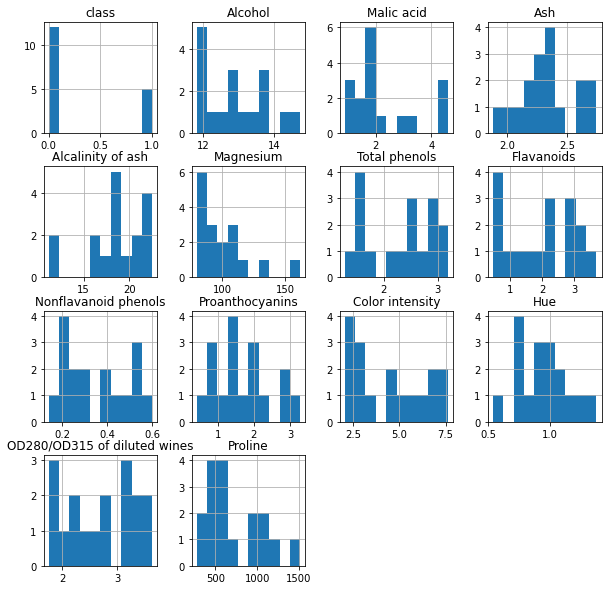

In [6]:
test.hist(figsize=(10,10))

array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic acid'}>,
        <AxesSubplot:title={'center':'Ash'}>,
        <AxesSubplot:title={'center':'Alcalinity of ash'}>],
       [<AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>,
        <AxesSubplot:title={'center':'Nonflavanoid phenols'}>],
       [<AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>,
        <AxesSubplot:title={'center':'OD280/OD315 of diluted wines'}>],
       [<AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

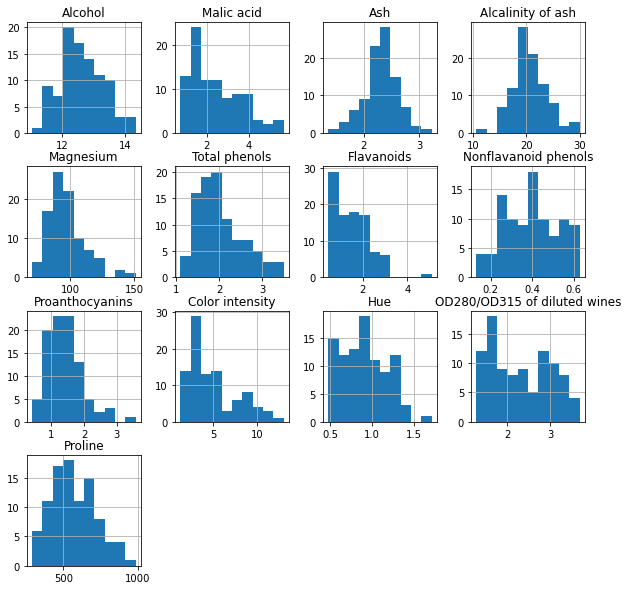

In [9]:
train.hist(figsize=(10,10))

Rozkłady zmiennych różnią się pomiedzy dwoma zbiorami, co nie jest zbyt fortunne.

Teraz przejdę do poszukiwania obserwacji odstających poprzez metodę klasteryzacji GMM, czyli podejście wielowymiarowe. Alternatywami są DBSCAN i OPTICS. Jednowymiarowe metody bazują na nierównościach, np. Markowa albo 3 sigm.

In [37]:
bic = [1]*10
for i in range(10):
    gmm = GaussianMixture(n_components=i+1)
    gmm.fit(train)
    bic[i] = gmm.bic(train)
np.where(bic==min(bic))

(array([0], dtype=int64),)

Bayesowskie kryterium informacyjne sugeruje wybór jednego komponentu w GMM. Wyniki będą wrażliwe na wartość odcięcia.

In [49]:
GMM = GaussianMixture(n_components=1, random_state=37)
GMM.fit(train)

GaussianMixture(random_state=37)

In [64]:
p_test = GMM.score_samples(test.drop(columns=["class"]))
y_pred = (p_test < -29).astype(float)
y_real = test["class"]

In [65]:
print(f"precision ", precision_score(y_real, y_pred) )
print(f"recall ", recall_score(y_real, y_pred)) 
print(f"score ",  f1_score(y_real, y_pred))

precision  0.8333333333333334
recall  1.0
score  0.9090909090909091


In [70]:
p_test = GMM.score_samples(test.drop(columns=["class"]))
y_pred = (p_test < -35).astype(float)
y_real = test["class"]

In [71]:
print(f"precision ", precision_score(y_real, y_pred) )
print(f"recall ", recall_score(y_real, y_pred)) 
print(f"F1 score ",  f1_score(y_real, y_pred))

precision  1.0
recall  0.6
score  0.7499999999999999


Rozpatrują ograniczenia niniejszego badania warto baczyć na mały rozmiar próby i niewielką ilość wymiarów oraz brak jasnego benchmarka, do którego możnaby odnieść wynik uzyskany GMM. Niemniej jednak wydaje się, że recall o wartości 1 (da odcięcia==29), czyli wykrycie wszystkich obserwacji odstających jest sukcesem. Do tego warto zaznaczyć, że zbyt wiele obserwacji, które nie były odstające nie został zaklasyfikowane jako takie, o czym świadczy precyzja. 

Bardzo ważny jest odpowiedni wybór punktu odcięcia. 